<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/test916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤넘버 그래프

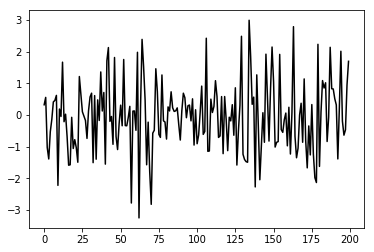

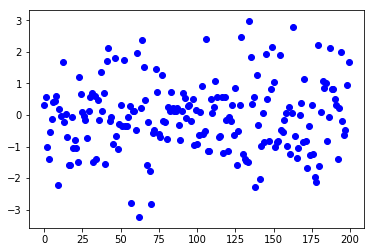

(array([ 3.,  4., 17., 30., 41., 49., 30., 10., 11.,  5.]),
 array([-3.24718264, -2.62390484, -2.00062704, -1.37734924, -0.75407144,
        -0.13079364,  0.49248416,  1.11576197,  1.73903977,  2.36231757,
         2.98559537]),
 <a list of 10 Patch objects>)

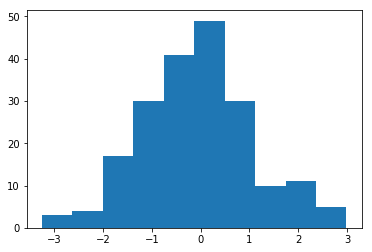

In [30]:
import numpy as np
import matplotlib.pyplot as plt
n = 200
y = np.random.randn(n)
x = range(n)
plt.plot(x, y, c='k')
y.mean()
plt.show()
plt.scatter(x, y, c='b')
plt.show()
plt.hist(y, bins=10)


공식 y = 3*x1 + 4*x2 + 5공식에서

y의 W1(3), W2(4), b(5)값을 찿는것

3, 4, 5는 임의의 제공값임

Ir : Leaning rate(계산시간을 의미)

w값이 많아질수록 값은 작아짐 실행으로 찾는다 어려움이 많다

In [148]:
x1 = np.random.rand(3)
x2 = np.random.rand(3)

y = x1*3 + x2*4 + 5

w1 = np.random.rand(1)
w2 = np.random.rand(1)

b = np.random.rand()
ir = 1

for i in range(500):
  y_pred = w1*x1 + w2*x2 + b
  e = y_pred - y
  w1 = w1 - ir*(e*x1).mean()
  w2 = w2 - ir*(e*x2).mean()

  b = b - ir*e.mean()
  print('i=', i, 'w1=',w1, 'w2=',w2,'b=', b, 'x1=',x1, 'x2=', x2,'error=', e.mean())
 


i= 0 w1= [3.89640902] w2= [6.11627004] b= 8.232264640061471 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= -7.353648748715606
i= 1 w1= [1.81275639] w2= [2.3614735] b= 3.1023656623218328 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= 5.129898977739638
i= 2 w1= [3.29729316] w2= [4.97015128] b= 6.663147920544658 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= -3.5607822582228246
i= 3 w1= [2.29591778] w2= [3.14941341] b= 4.174755684833491 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= 2.4883922357111667
i= 4 w1= [3.02313547] w2= [4.41239417] b= 5.897872478423203 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= -1.7231167935897123
i= 5 w1= [2.5452548] w2= [3.52902692] b= 4.689791509776972 x1= [0.75257275 0.26894974 0.15792842] x2= [0.73522119 0.79355027 0.66170163] error= 1.2080809686462306
i= 6 w1= [2.9045

## gradiant descent구현해보기
   처음에 준비할일 : x, y준비하기

In [0]:
n = 100
x1 = np.random.rand(n)
x2 = np.random.rand(n)
y = x1*3 + x2*0.5 + 1

In [192]:
x1.shape, x2.shape, y.shape

((100,), (100,), (100,))

In [0]:
x = np.vstack((x1,x2)).T

In [193]:
x.shape

(100, 2)

In [175]:
x

array([[0.1081147 , 0.79616115],
       [0.02036229, 0.63631594],
       [0.29537234, 0.92181683],
       [0.41796969, 0.87174969],
       [0.65242845, 0.18325103],
       [0.51165051, 0.45544677],
       [0.21757119, 0.28980732],
       [0.68914955, 0.95077521],
       [0.71025326, 0.72714039],
       [0.15224593, 0.84730415],
       [0.68198237, 0.41734289],
       [0.09544995, 0.60069854],
       [0.47202408, 0.60608205],
       [0.38123965, 0.09059168],
       [0.89599952, 0.33899832],
       [0.52918086, 0.73928845],
       [0.10755704, 0.93307723],
       [0.54923766, 0.11350881],
       [0.08558115, 0.86605633],
       [0.97529806, 0.49515966],
       [0.49938049, 0.88712789],
       [0.8647688 , 0.34845111],
       [0.9817105 , 0.71650594],
       [0.95588235, 0.17385001],
       [0.77085514, 0.90462402],
       [0.77127061, 0.006166  ],
       [0.2539066 , 0.88143785],
       [0.92900229, 0.82006597],
       [0.69291539, 0.8708564 ],
       [0.30904659, 0.5920332 ],
       [0.

In [0]:
x[:5]

In [189]:
# from sklearn.linear_model import SGDRegressor
# model = SGDRegressor() # (1) 모델 선택
# model.fit(x, y) #(2) 모델 학습

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [203]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # (1) 모델 선택
model.fit(x, y) #(2) 모델 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [204]:
model.coef_, model.intercept_

(array([3. , 0.5]), 1.0000000000000018)

In [205]:
model.predict([[0.6, 1], [0.5, 0.5]])

array([3.3 , 2.75])

In [0]:
# from sklearn.linear_model import LinearRegression